# Classification models to detect chronic kidney disease¶

## PHASE 1: Data exploration and cleaning

***IMPORT LIBRARIES***

To develop this classification model it will be used the sklearn library due to it contains several algorithms, such as support vector machines, random forests and k-neighbors and it also supports numerical and scientific Python libraries such as NumPy.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools

**UPLOADING THE DATA**

A xlsx file called "chronickidney.xlsx" will be loaded as the dataframe to work in

In [6]:
df = pd.read_excel("chronickidney.xlsx")

**INITIAL DATA EXPLORATION**

df.shape

The dataframe is composed for 400 rows and 25 columns

In [8]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


*Looking for Null values*

In a first overview, it is observed that dataframe is composed for both numeric and categorical features. There are Null values showed as "?" symbol. Its will be replaced as "NaN" values

In [9]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


Other inconsistent data are also modified

In [24]:
df= df.replace(to_replace = ["\tno", '\tyes', ' yes'], value = ['no', 'yes', 'yes'])

In a third checking, it is verified that there are more Null values. It will be managed later

In [25]:
df.isnull().sum()

age       9
bp       12
sg       41
al       40
su       43
pc       58
pcc       4
ba        4
bgr      42
bu       18
sc       16
hemo     46
pcv      64
htn       2
dm        2
cad       2
appet     1
pe        1
ane       1
class     0
dtype: int64

**DATA CLEANING**

As a normalized rule, all rows with more than 40% of Null values (15 values) will be removed

In [26]:
df.dropna(axis=0, thresh=15, inplace = True) 
df.shape

(384, 20)

In regards to columns treatment, columns with more than 80 NaNs are removed

In [27]:
df.dropna(axis=1, thresh=320, inplace = True) 
df.shape

(384, 20)

Numerical and categorical columns are separated to work them independently

In [28]:
#function to get numeric variables
lista_numericas = df._get_numeric_data().columns
df_num = df[lista_numericas]
df_num.head(5)

,age,bp,sg,al,su,bgr,bu,sc,hemo
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,15.4
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,11.3
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,9.6
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,11.2
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,11.6


In [29]:
df_cat = df.drop(lista_numericas, axis=1)
df_cat.head(5)

,pc,pcc,ba,pcv,htn,dm,cad,appet,pe,ane,class
0,normal,notpresent,notpresent,44,yes,yes,no,good,no,no,ckd
1,normal,notpresent,notpresent,38,no,no,no,good,no,no,ckd
2,normal,notpresent,notpresent,31,no,yes,no,poor,no,yes,ckd
3,abnormal,present,notpresent,32,yes,no,no,poor,yes,yes,ckd
4,normal,notpresent,notpresent,35,no,no,no,good,no,no,ckd


Features that won't be detected as numeric are handled separately

In [30]:
list_num = ["pcv"]
df_cat = df_cat.drop(list_num, axis=1)
df_num= pd.concat([df_num, df[list_num]], sort=False, axis=1)

In [31]:
df_cat["al"] = df_num["al"]
del df_num["al"]
df_cat.head(3)

,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class,al
0,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd,1.0
1,normal,notpresent,notpresent,no,no,no,good,no,no,ckd,4.0
2,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd,2.0


***NaN Imputation***

Numeric features are imputed with 3 nearest neighbors class

In [32]:
imputer = KNNImputer(n_neighbors=3)
df_num_imp = imputer.fit_transform(df_num)
df_num = pd.DataFrame(df_num_imp, columns = df_num.columns)

Categorical features are imputed by using Simple Imputer class, which replaces missing values for the most frecuent one

In [33]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_cat_imp = imputer.fit_transform(df_cat)
df_cat = pd.DataFrame(df_cat_imp, columns = df_cat.columns)

***Dummify categorical features and join dataframes***

All categorical features are dummified in order to normalize values to work in a further prediction model

In [34]:
for i in df_cat.columns[:-2]:
    dummy = pd.get_dummies(df_cat[i], prefix = i)
    df_num = pd.concat([df_num, dummy], axis=1)

***Label Encoding***

Feature "class" in converted to numeric value, where 0 is positive chronic kidney disease and 1, negative

In [36]:
class_labelEncoding = LabelEncoder()
clase = class_labelEncoding.fit_transform(df["class"].values)
df_cat["clase"] = clase

***Feature Selection***

By applying the Feature Selection algorithm, it can be observed which features give us more and better information in order to understand its importance and make decissions about on which features keep or disregard.

In [37]:
y = np.asarray(df_cat["clase"])
X = np.asarray(df_num)

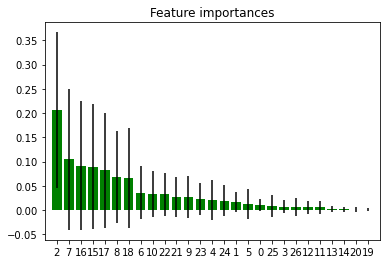

In [40]:
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [41]:
for j, i in enumerate(df_num.columns):
    print(j, i)

0 age
1 bp
2 sg
3 su
4 bgr
5 bu
6 sc
7 hemo
8 pcv
9 pc_abnormal
10 pc_normal
11 pcc_notpresent
12 pcc_present
13 ba_notpresent
14 ba_present
15 htn_no
16 htn_yes
17 dm_no
18 dm_yes
19 cad_no
20 cad_yes
21 appet_good
22 appet_poor
23 pe_no
24 pe_yes
25 ane_no
26 ane_yes


Algorithm shows that most valuable features are sg, hemo and htn_yes. In the other side, algorithm determines that less important features are ba_present, cad_yes and cad_no, in that order.

## PHASE 2: CLASSIFICATION MODELS

Models have been selected due to their prediction rate and are shown below.

The validation method used is Cross-validation with 10 folders to evaluate how the results of the statistical analysis generalize to an independent data set. https://en.wikipedia.org/wiki/Cross-validation_(statistics)

In [58]:
def clasificador_x(clasificador, X):
    """Get classification model results
    
    Parameters
    ----------
    clasificador : function
         function is machine learning algorithm 
    
    X : array
        X contains unlabeled data
        
    Returns
    -------
    classification_report : str
        returns a text summary of the precision, recall, F1 score for each class.
    
    """
    
    kf = KFold(n_splits=10)
    kf.get_n_splits(X)
    yhat=[]
    lista_ies = []
    lista_exis = []
    KFold(n_splits=2, random_state=1, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        yhat1 = clasificador.fit(X_train, y_train).predict(X_test)
        
        yhat.extend(yhat1)
        lista_ies.extend(y_test)
        lista_exis.extend(X_test)
    class_names = ['ckd', 'nockd']
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Reds):
        """Get plot confusion matrix normalize or without normalize
    
        Parameters
        ----------
        cm : ndarray
             confusion matrix

        classes : lst
            class name list
            
        title : str
            confusion matrix title
            
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        else:
            pass
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(yhat, lista_ies)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, cmap=plt.cm.Blues,
                          title='Confusion matrix, without normalization')
    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, cmap=plt.cm.Blues,
                          title='Normalized confusion matrix')
      
    
    return print(classification_report(lista_ies, yhat, digits=3))

### Logistic Regression

Logistic regression is a traditional statistical model that in its basic form uses a logistic function to model a binary dependent variable and can be used for classification problems with two possible values. https://en.wikipedia.org/wiki/Logistic_regression

              precision    recall  f1-score   support

           0      0.987     0.953     0.970       234
           1      0.930     0.980     0.955       150

    accuracy                          0.964       384
   macro avg      0.959     0.966     0.962       384
weighted avg      0.965     0.964     0.964       384



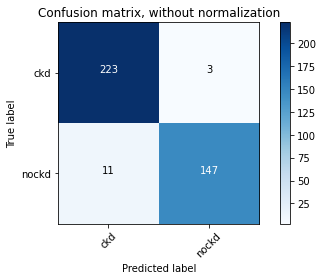

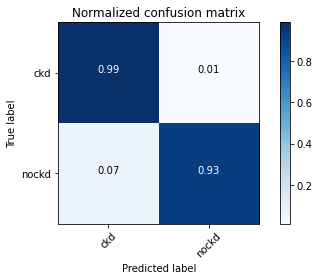

In [59]:
clasificador_x(LogisticRegression(max_iter = 1000), X)

Logistic Regression models returns an accuracy/f1-score of 0.962 and an similiar score in both classes.

### Random Forest

Random Forest are a modern and popular method for various machine learning tasks based in Decision trees. https://en.wikipedia.org/wiki/Random_forest

              precision    recall  f1-score   support

           0      0.983     1.000     0.992       234
           1      1.000     0.973     0.986       150

    accuracy                          0.990       384
   macro avg      0.992     0.987     0.989       384
weighted avg      0.990     0.990     0.990       384



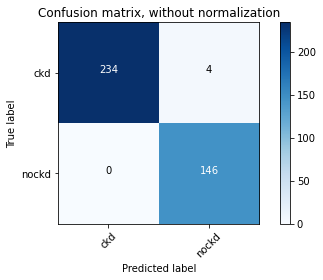

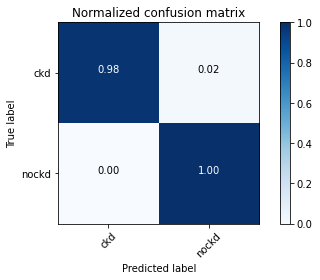

In [60]:
clasificador_x(RandomForestClassifier(), X)

Random Forest model's accuracy/f1score is 0.982. This is a pretty good score but the number of false negatives is worse than first model

### Support Vector Machines (SVM)


Support Vector Machines are a modern supervised learning models, based in machine learning used for classification and regression analysis and is one of the most robust prediction methods. https://en.wikipedia.org/wiki/Support_vector_machine

Support Vector Machines improve with scaled data. The main advantage of scaling is to avoid attributes in greater numeric ranges dominating those in smaller numeric ranges. Another advantage is to avoid numerical difficulties during the calculation.

              precision    recall  f1-score   support

           0      0.996     0.983     0.989       234
           1      0.974     0.993     0.983       150

    accuracy                          0.987       384
   macro avg      0.985     0.988     0.986       384
weighted avg      0.987     0.987     0.987       384



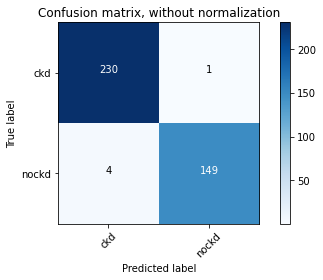

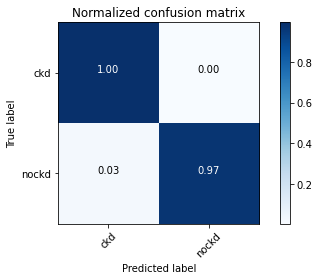

In [61]:
X_scaled = preprocessing.scale(X) 

clasificador_x(svm.SVC(kernel='linear'), X_scaled)

Support Vector Machines gets the best accuracy/f1-score with 0.985 points and improves the prediction of false negatives. It is observed that when the model predicts chronic kidney disease negative the error is 0%, so the precision of the model is very acceptable. When the model predicts chronic kidney disease positive the error is 3%.

### PHASE 3: CONCLUSIONS

It is concluded that the best classifier is the Support Vector Machines (SVM) with accuracy of 98,5%.

Also, It can be concluded that the model satisfactorily predicts true negatives, with a rate of 0% of false negatives.

To improve the model, it would be necessary to have more information about the variables that are being studied and analyze the false positives to obtain possible new variables to enrich it.
